# Data cleaning & EDA

## Data cleaning:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
train_d = pd.read_csv('../datasets/train.csv')

In [3]:
train_d.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
train_d.shape

(2051, 81)

### Initial look into the data provided by the dataset: 

First we clean the dataset up, then we study correlation with the target variable (SalePrice)

In [5]:
# Checking for nulls
train_d.isnull().sum()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    330
               ... 
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
SalePrice         0
Length: 81, dtype: int64

In [6]:
#Listing all columns that contain nulls
train_d.columns[train_d.isnull().any()].tolist() 
#stackoverflow: https://stackoverflow.com/questions/36226083/how-to-find-which-columns-contain-any-nan-value-in-pandas-dataframe

['Lot Frontage',
 'Alley',
 'Mas Vnr Type',
 'Mas Vnr Area',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Fireplace Qu',
 'Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage Area',
 'Garage Qual',
 'Garage Cond',
 'Pool QC',
 'Fence',
 'Misc Feature']

In [7]:
# Dropping all rows with nulls 
train_d.dropna(inplace = True)
train_d.shape

(0, 81)

Clearly, first, we have to choose what columns we want before dropping every row containing a null.

In [8]:
# Re-loading data
train_data = pd.read_csv('../datasets/train.csv')

In [9]:
train_data.shape

(2051, 81)

In [10]:
train_data.columns = [col.replace(' ', '_').lower() for col in train_data.columns] #Editing the column names
train_data.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

In [11]:
#Making sure of code
train_data['lot_frontage'].isnull().sum() == 330

True

In [14]:
# Calling all columns that contain >= than 5% of null cells
def Max_nulls(dataset):
    null_column_count = {}
    null_columns = dataset.columns[dataset.isnull().any()].tolist() 
    for column in null_columns:
        count = dataset[column].isnull().sum()
        '''We only want the columns that contain more nulls than 5% of the dataset's shape so we can drop them'''
        if count >= (dataset.shape[0] * 0.05):
            null_column_count[column] = count
    return null_column_count

In [15]:
Max_nulls(train_data)

{'lot_frontage': 330,
 'alley': 1911,
 'fireplace_qu': 1000,
 'garage_type': 113,
 'garage_yr_blt': 114,
 'garage_finish': 114,
 'garage_qual': 114,
 'garage_cond': 114,
 'pool_qc': 2042,
 'fence': 1651,
 'misc_feature': 1986}

In [16]:
train_data.shape

(2051, 81)

In [17]:
# Dropping all columns that contain >= than 5% of null cells

null_column_drop = []
null_columns = train_data.columns[train_data.isnull().any()].tolist() 
for column in null_columns:
    count = train_data[column].isnull().sum()
    '''We only want the columns that contain more nulls than 5% of the dataset's shape so we can drop them'''
    if count >= (train_data.shape[0] * 0.05):
        null_column_drop.append(column)
train_data.drop(columns = null_column_drop, inplace = True)

In [18]:
train_data.shape

(2051, 70)

In [19]:
#Checking how many rows will get dropped in whole if we drop nulls after getting rid of the prior selected columns

sum([True for idx,row in train_data.iterrows() if any(row.isnull())])
#code from stackoverflow: https://stackoverflow.com/questions/28199524/best-way-to-count-the-number-of-rows-with-missing-values-in-a-pandas-dataframe

82

82 rows dropped would represent almost a 4% loss of data, will proceed to impute the numerical missing cells to see if this number decreases

### Imputing missing values via *Iterative Imputer* in sklearn

In [20]:
# imports
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

In [21]:
# dataframe:
train_data.shape

(2051, 70)

In [22]:
# If we want to impute, we can only do so with numerical vars
train_data_num = train_data.select_dtypes(include='number')

#code from: https://pythonexamples.org/pandas-dataframe-select-columns-of-numeric-datatype/

In [23]:
train_data_num = pd.DataFrame(train_data_num)

train_data_num.head()

,id,pid,ms_subclass,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,...,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
0,109,533352170,60,13517,6,8,1976,2005,289.0,533.0,...,0,44,0,0,0,0,0,3,2010,130500
1,544,531379050,60,11492,7,5,1996,1997,132.0,637.0,...,0,74,0,0,0,0,0,4,2009,220000
2,153,535304180,20,7922,5,7,1953,2007,0.0,731.0,...,0,52,0,0,0,0,0,1,2010,109000
3,318,916386060,60,9802,5,5,2006,2007,0.0,0.0,...,100,0,0,0,0,0,0,4,2010,174000
4,255,906425045,50,14235,6,8,1900,1993,0.0,0.0,...,0,59,0,0,0,0,0,3,2010,138500


In [24]:
it_imp = IterativeImputer(estimator = LinearRegression())

it_imp_train_data_num = it_imp.fit_transform(train_data_num)

it_imp_train_data_num = pd.DataFrame(it_imp_train_data_num, columns = train_data_num.columns)

In [25]:
train_data_num.shape == it_imp_train_data_num.shape

True

In [26]:
# Checking how many null's in numerical type columns before imputing
train_data_num.isnull().sum()

id                  0
pid                 0
ms_subclass         0
lot_area            0
overall_qual        0
overall_cond        0
year_built          0
year_remod/add      0
mas_vnr_area       22
bsmtfin_sf_1        1
bsmtfin_sf_2        1
bsmt_unf_sf         1
total_bsmt_sf       1
1st_flr_sf          0
2nd_flr_sf          0
low_qual_fin_sf     0
gr_liv_area         0
bsmt_full_bath      2
bsmt_half_bath      2
full_bath           0
half_bath           0
bedroom_abvgr       0
kitchen_abvgr       0
totrms_abvgrd       0
fireplaces          0
garage_cars         1
garage_area         1
wood_deck_sf        0
open_porch_sf       0
enclosed_porch      0
3ssn_porch          0
screen_porch        0
pool_area           0
misc_val            0
mo_sold             0
yr_sold             0
saleprice           0
dtype: int64

In [27]:
# Checking or NO nulls after imputing
it_imp_train_data_num.isnull().sum()

id                 0
pid                0
ms_subclass        0
lot_area           0
overall_qual       0
overall_cond       0
year_built         0
year_remod/add     0
mas_vnr_area       0
bsmtfin_sf_1       0
bsmtfin_sf_2       0
bsmt_unf_sf        0
total_bsmt_sf      0
1st_flr_sf         0
2nd_flr_sf         0
low_qual_fin_sf    0
gr_liv_area        0
bsmt_full_bath     0
bsmt_half_bath     0
full_bath          0
half_bath          0
bedroom_abvgr      0
kitchen_abvgr      0
totrms_abvgrd      0
fireplaces         0
garage_cars        0
garage_area        0
wood_deck_sf       0
open_porch_sf      0
enclosed_porch     0
3ssn_porch         0
screen_porch       0
pool_area          0
misc_val           0
mo_sold            0
yr_sold            0
saleprice          0
dtype: int64

### We can clearly see the missing values are gone (of the numerical type columns)

In [28]:
# Only categorical variables
train_data_cat = train_data.select_dtypes(exclude = 'number')

#code from: https://pythonexamples.org/pandas-dataframe-select-columns-of-numeric-datatype/

In [29]:
train_data_cat.shape

(2051, 33)

In [30]:
train_data_cat.columns

Index(['ms_zoning', 'street', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'roof_style', 'roof_matl',
       'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_type_2', 'heating', 'heating_qc',
       'central_air', 'electrical', 'kitchen_qual', 'functional',
       'paved_drive', 'sale_type'],
      dtype='object')

In [31]:
train_data_num.shape

(2051, 37)

In [32]:
train_data_num.columns

Index(['id', 'pid', 'ms_subclass', 'lot_area', 'overall_qual', 'overall_cond',
       'year_built', 'year_remod/add', 'mas_vnr_area', 'bsmtfin_sf_1',
       'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces', 'garage_cars',
       'garage_area', 'wood_deck_sf', 'open_porch_sf', 'enclosed_porch',
       '3ssn_porch', 'screen_porch', 'pool_area', 'misc_val', 'mo_sold',
       'yr_sold', 'saleprice'],
      dtype='object')

In [33]:
# Merge
train_clean_imputed = pd.concat([train_data_num, train_data_cat], axis=1)

In [34]:
train_clean_imputed.shape

(2051, 70)

In [35]:
#Checking how many rows will get dropped in whole after imputing missing values (in numerical variables)

sum([True for idx,row in train_clean_imputed.iterrows() if any(row.isnull())])
#code from stackoverflow: https://stackoverflow.com/questions/28199524/best-way-to-count-the-number-of-rows-with-missing-values-in-a-pandas-dataframe

82

Imputating missing values from numerical type columns has NOT impacted at all. 82 rows dropped would represent almost a 4% loss of data,
which will be accepted.

In [36]:
# Drop the missing values, checking shape
train_clean_imputed.dropna(inplace = True)
train_clean_imputed.shape

(1969, 70)

We have NO more null values

### Checking for potential corrupting charachters in the categorical type columns

In [37]:
# List of all columns with object as dtype (categorical variables)
obj_types = [column for column in train_clean_imputed.columns if train_clean_imputed[column].dtypes == object]

In [38]:
len(obj_types)

33

In [39]:
# Looking for unique values in object type columns

for column in obj_types:
    print(f'{column} : {sorted(list(train_clean_imputed[column].unique()), reverse = True)[0:3]}')

ms_zoning : ['RM', 'RL', 'RH']
street : ['Pave', 'Grvl']
lot_shape : ['Reg', 'IR3', 'IR2']
land_contour : ['Lvl', 'Low', 'HLS']
utilities : ['NoSeWa', 'AllPub']
lot_config : ['Inside', 'FR3', 'FR2']
land_slope : ['Sev', 'Mod', 'Gtl']
neighborhood : ['Veenker', 'Timber', 'StoneBr']
condition_1 : ['RRNn', 'RRNe', 'RRAn']
condition_2 : ['RRNn', 'RRAn', 'RRAe']
bldg_type : ['TwnhsE', 'Twnhs', 'Duplex']
house_style : ['SLvl', 'SFoyer', '2Story']
roof_style : ['Shed', 'Mansard', 'Hip']
roof_matl : ['WdShngl', 'WdShake', 'Tar&Grv']
exterior_1st : ['WdShing', 'Wd Sdng', 'VinylSd']
exterior_2nd : ['Wd Shng', 'Wd Sdng', 'VinylSd']
mas_vnr_type : ['Stone', 'None', 'BrkFace']
exter_qual : ['TA', 'Gd', 'Fa']
exter_cond : ['TA', 'Po', 'Gd']
foundation : ['Wood', 'Stone', 'PConc']
bsmt_qual : ['TA', 'Po', 'Gd']
bsmt_cond : ['TA', 'Po', 'Gd']
bsmt_exposure : ['No', 'Mn', 'Gd']
bsmtfin_type_1 : ['Unf', 'Rec', 'LwQ']
bsmtfin_type_2 : ['Unf', 'Rec', 'LwQ']
heating : ['OthW', 'Grav', 'GasW']
heating_qc : 

#### (Everything seems normal with the dtypes, no strange characters)

### Now, we study the relation between the categorical variables and our target value (saleprice)

##### One-way ANOVA model:
A one-way layout consists of a single factor with several levels and multiple observations at each level. With this kind of layout we can calculate the mean of the observations within each level of our factor.

About ANOVA hypothesis test:
- This test measures if there are any significant differences between the means of the values of the numeric variable for each categorical value.
- Null hypothesis (HO): the variables are not correlated with each other

In [40]:
# code from: https://thinkingneuron.com/how-to-measure-the-correlation-between-a-numeric-and-a-categorical-variable-in-python/

from scipy.stats import f_oneway
#f_oneway() function takes the group data as input and returns F-statistic and P-value
for column in obj_types:
    #The next line finds out the sale price for each categorical value of the column as a list
    CategoryGroupLists= train_clean_imputed.groupby(column)['saleprice'].apply(list)
    #Performing the ANOVA test
    AnovaResults = f_oneway(*CategoryGroupLists)
    if AnovaResults[1] >= 0.05:
        print(f'{column} P-value for Anova is: {AnovaResults[1]}')

utilities P-value for Anova is: 0.5652959867667605


Because the p-value of the ANOVA test is greater than 0.05, HO is confirmed and no correlation is found between utilities and saleprice

In [41]:
#Dropping utilities column

train_clean_imputed.drop(columns = ['utilities'], inplace = True)
train_clean_imputed.shape

(1969, 69)

## EDA:

In [42]:
train_clean_imputed.head()

,id,pid,ms_subclass,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,...,bsmtfin_type_1,bsmtfin_type_2,heating,heating_qc,central_air,electrical,kitchen_qual,functional,paved_drive,sale_type
0,109,533352170,60,13517,6,8,1976,2005,289.0,533.0,...,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD
1,544,531379050,60,11492,7,5,1996,1997,132.0,637.0,...,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD
2,153,535304180,20,7922,5,7,1953,2007,0.0,731.0,...,GLQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,Y,WD
3,318,916386060,60,9802,5,5,2006,2007,0.0,0.0,...,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,Y,WD
4,255,906425045,50,14235,6,8,1900,1993,0.0,0.0,...,Unf,Unf,GasA,TA,Y,SBrkr,TA,Typ,N,WD


In [43]:
train_clean_imputed.shape

(1969, 69)

### First, we are studying if there are any clear outliers that must be dropped

As the data documentation recommends, we should remove any houses with more than 4000 sqft from the dataset to eliminate unusual observations. A plot of saleprice vs gr_liv_area will indicate them quickly.

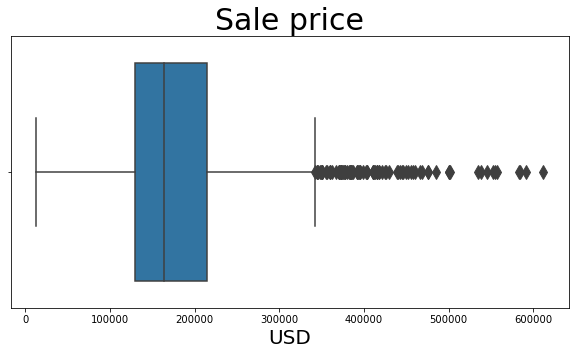

In [44]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(10, 5))
sns.boxplot(train_clean_imputed['saleprice'], fliersize = 10)
plt.title(label = 'Sale price', fontdict = {'size': 30}, loc = 'center')
plt.xlabel('USD', fontdict = {'size': 20}, loc = 'center');

In [45]:
# 5 largest sale prices
train_clean_imputed['saleprice'].nlargest(5)

#Code from: https://www.learneasysteps.com/how-to-calculate-top-5-max-values-in-pandas/

1671    611657
1964    591587
1692    584500
1796    582933
151     556581
Name: saleprice, dtype: int64

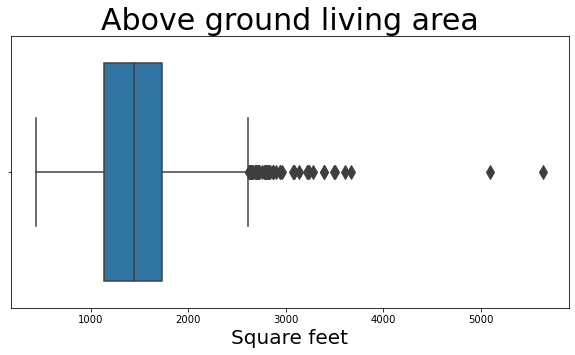

In [46]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(10, 5))
sns.boxplot(train_clean_imputed['gr_liv_area'], fliersize = 10)
plt.title(label = 'Above ground living area', fontdict = {'size': 30}, loc = 'center')
plt.xlabel('Square feet', fontdict = {'size': 20}, loc = 'center');

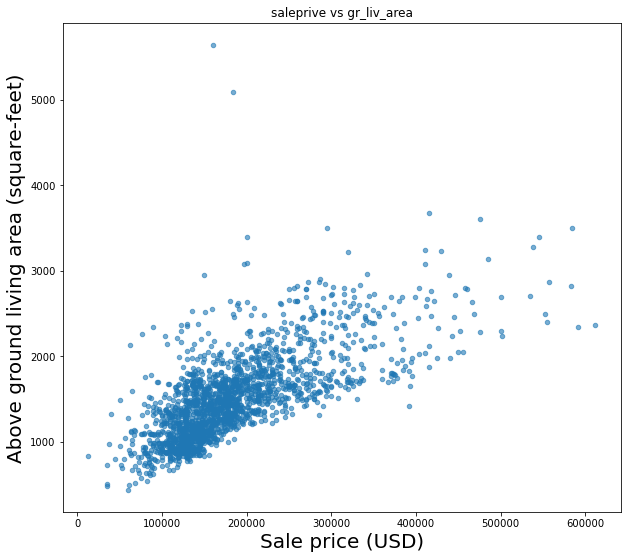

In [47]:
vs = train_clean_imputed.plot(
    kind='scatter', 
    x='saleprice',
    y='gr_liv_area',
    title="saleprive vs gr_liv_area",
    alpha=0.6, # set the opacity of the points (0 is completely transparent and 1 is opaque)
    figsize=(10,9)
)

vs.set_xlabel("Sale price (USD)", fontsize=20) # set the axes labels with a fontsize
vs.set_ylabel("Above ground living area (square-feet)", fontsize = 20);

In [48]:
# Removing outliers

i = train_clean_imputed[train_clean_imputed['gr_liv_area'] >= 4000].index #Looking for the row indexes`
i

Int64Index([960, 1885], dtype='int64')

In [49]:
#Deleting rows
train_clean_imputed.drop(labels = [960, 1885], axis = 0, inplace = True)

In [50]:
train_clean_imputed.shape

(1967, 69)

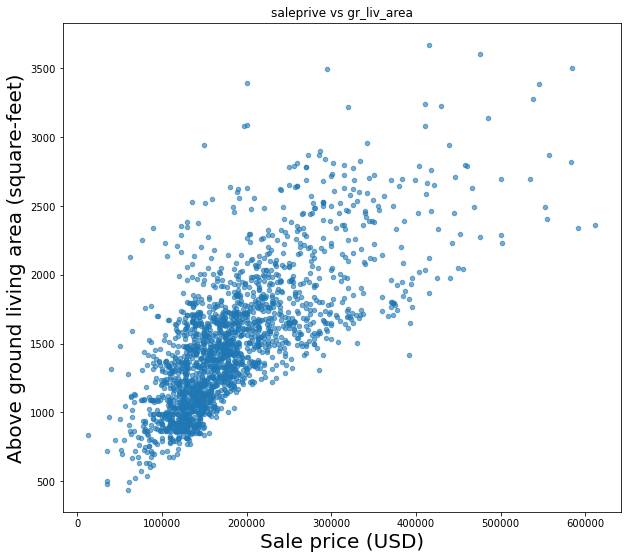

In [51]:
# Checking plot again for missing outliers

vs = train_clean_imputed.plot(
    kind='scatter', 
    x='saleprice',
    y='gr_liv_area',
    title="saleprive vs gr_liv_area",
    alpha=0.6, # set the opacity of the points (0 is completely transparent and 1 is opaque)
    figsize=(10,9)
)

vs.set_xlabel("Sale price (USD)", fontsize=20) # set the axes labels with a fontsize
vs.set_ylabel("Above ground living area (square-feet)", fontsize = 20);

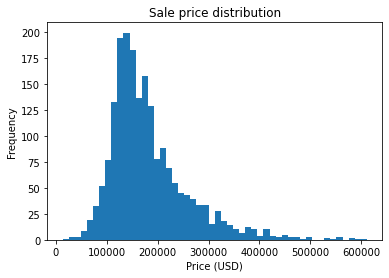

In [52]:
# Checking "saleprice" distribution:

sp = (
    train_clean_imputed['saleprice']      
    .plot(
        kind='hist',
        title='Sale price distribution',
        bins = 50
        )
)

sp.set(xlabel = 'Price (USD)');

As we can observe, it is a bit right skewed, but fairly normal distributed! We should expect our sale price predictions to follow a normal distribution as well.

In [53]:
#Saving the cleaned dataset
train_clean_imputed.to_csv('../datasets/train-data-clean-imputed-1.1.csv', index = False)

### Summary statistics:

In [54]:
train_clean_imputed.describe()

,id,pid,ms_subclass,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,...,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
count,1967.000000,1.967000e+03,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000,...,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000
mean,1471.879004,7.123671e+08,57.097102,9963.339095,6.150991,5.584138,1971.777834,1984.410269,100.826640,449.789019,...,95.674123,47.523132,22.318251,2.702084,16.882054,1.971022,42.795628,6.213015,2007.776309,182904.013726
std,844.954843,1.886656e+08,43.022708,6569.493107,1.381125,1.105757,30.221107,20.857140,173.993203,438.861646,...,129.233369,65.359631,59.724898,25.757155,57.823981,34.833212,436.154324,2.745175,1.313824,78976.784441
min,1.000000,5.263011e+08,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,746.500000,5.284562e+08,20.000000,7500.000000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,130000.000000
50%,1480.000000,5.354521e+08,50.000000,9400.000000,6.000000,5.000000,1975.000000,1993.000000,0.000000,384.000000,...,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163500.000000
75%,2194.500000,9.071750e+08,70.000000,11478.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,740.500000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214950.000000
max,2930.000000,9.241520e+08,190.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2188.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,12500.000000,12.000000,2010.000000,611657.000000


One thing that pops out is the diferent scales there are between some variables.

### Correlations to help us with initial feature selection
##### Correlation meaning:
##### - Perfect:  (+-)1
##### - Strong:  (+-)0.75 to 1
##### - Moderate:  (+-)0.5 to 0.75
##### - Weak:  <(+-)0.5

In [55]:
# For numerical variables:
train_clean_imputed[train_clean_imputed.columns[1:]].corr()['saleprice'][:] 

pid               -0.248726
ms_subclass       -0.087354
lot_area           0.316419
overall_qual       0.801199
overall_cond      -0.114619
year_built         0.568381
year_remod/add     0.542079
mas_vnr_area       0.518340
bsmtfin_sf_1       0.433637
bsmtfin_sf_2       0.010383
bsmt_unf_sf        0.162288
total_bsmt_sf      0.672959
1st_flr_sf         0.662566
2nd_flr_sf         0.245800
low_qual_fin_sf   -0.041805
gr_liv_area        0.724718
bsmt_full_bath     0.270892
bsmt_half_bath    -0.051353
full_bath          0.548328
half_bath          0.272597
bedroom_abvgr      0.129850
kitchen_abvgr     -0.091725
totrms_abvgrd      0.519777
fireplaces         0.466362
garage_cars        0.651983
garage_area        0.656542
wood_deck_sf       0.324089
open_porch_sf      0.326029
enclosed_porch    -0.138595
3ssn_porch         0.048045
screen_porch       0.138821
pool_area          0.032443
misc_val          -0.004867
mo_sold            0.023439
yr_sold           -0.009385
saleprice          1

\
The best correlated numerical variables with the target value ('saleprice') are:\
    - overall_qual: 0.80\
    - total_bsmt_sf: 0.67\
    - 1st_flr_sf: 0.66 (will be very correlated with 'gr_liv_area' variable, only choose one of two)\
    - gr_liv_area: 0.72\
    - garage_cars: 0.651983 (will be very correlated with 'garage_area' variable, only choose one of two)\
    - garage_area: 0.656542
 

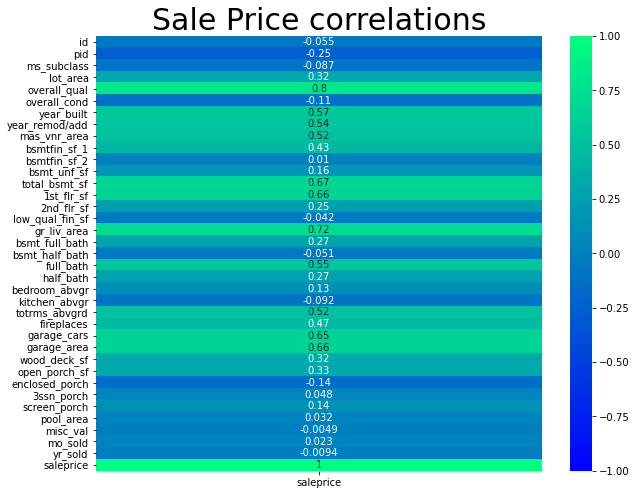

In [71]:
# Just with 'has_heart_disease'
plt.figure(figsize = (10, 8))
sns.heatmap(train_clean_imputed.corr()[['saleprice']],
           cmap = 'winter',
           annot = True,
           vmin = -1,
           vmax = 1);
plt.title(label = 'Sale Price correlations', fontdict = {'size': 30}, loc = 'center');

### Now lets study the categorical variables

In [56]:
# List of all columns with object as dtype (categorical variables)
obj_tp = [column for column in train_clean_imputed.columns if train_clean_imputed[column].dtypes == object]

In [57]:
#Looking for the categorical variables with only two vars

for column in obj_tp:
    if len(list(train_clean_imputed[column].unique())) == 2:
        print(column,train_clean_imputed[column].unique())

street ['Pave' 'Grvl']
central_air ['Y' 'N']


In [58]:
# Changing street and central_air into numerical: 
#for street: Pave = 1 / Grvl = 0
#for central_air: Y=1 / N=0
train_clean_imputed.street.replace(('Pave', 'Grvl'), (1, 0), inplace = True)
train_clean_imputed.central_air.replace(('Y', 'N'), (1, 0), inplace = True)

In [59]:
train_clean_imputed['street'].value_counts()

1    1961
0       6
Name: street, dtype: int64

In [60]:
train_clean_imputed['central_air'].value_counts()

1    1848
0     119
Name: central_air, dtype: int64

\
Something interesting to notice is that these columns are very bias and are not going to give the model much help to train.\
Deleting these columns:

In [61]:
train_clean_imputed.shape

(1967, 69)

In [62]:
train_clean_imputed.drop(columns = ['street', 'central_air'], inplace = True)

In [63]:
train_clean_imputed.shape

(1967, 67)

## (saving cleaned dataframe as csv)

In [64]:
#Saving the cleaned dataset
train_clean_imputed.to_csv('../datasets/train-data-clean-imputed-1.1.csv', index = False)

### Lets do a one-way ANOVA test

In [65]:
# List of all columns with object as dtype (categorical variables)
obj = [column for column in train_clean_imputed.columns if train_clean_imputed[column].dtypes == object]

In [66]:
# code from: https://thinkingneuron.com/how-to-measure-the-correlation-between-a-numeric-and-a-categorical-variable-in-python/

from scipy.stats import f_oneway
#f_oneway() function takes the group data as input and returns F-statistic and P-value
ll = []
for column in obj:
    #The next line finds out the sale price for each categorical value of the column as a list
    CategoryGroupLists= train_clean_imputed.groupby(column)['saleprice'].apply(list)
    #Performing the ANOVA test
    AnovaResults = f_oneway(*CategoryGroupLists)
    
    print(f'{column} P-value for Anova is: {AnovaResults[1]}')

ms_zoning P-value for Anova is: 3.5594964066113955e-48
lot_shape P-value for Anova is: 4.1851372168757877e-41
land_contour P-value for Anova is: 1.7278368398914164e-24
lot_config P-value for Anova is: 8.104811118480977e-12
land_slope P-value for Anova is: 0.0042170975104003725
neighborhood P-value for Anova is: 0.0
condition_1 P-value for Anova is: 1.1626340435253984e-18
condition_2 P-value for Anova is: 2.10675633504663e-09
bldg_type P-value for Anova is: 3.205278745010564e-14
house_style P-value for Anova is: 4.814039959041962e-31
roof_style P-value for Anova is: 1.2822276213403982e-30
roof_matl P-value for Anova is: 5.693147567701473e-05
exterior_1st P-value for Anova is: 1.4541329707263623e-78
exterior_2nd P-value for Anova is: 3.325706181675559e-72
mas_vnr_type P-value for Anova is: 2.469493793666636e-98
exter_qual P-value for Anova is: 1.4908958e-316
exter_cond P-value for Anova is: 1.2800711090166075e-11
foundation P-value for Anova is: 5.314239860447311e-139
bsmt_qual P-value f

Seems like there is no real significant information due to the fact that all p-values are practically zero. Anyway, lets select the smallest.\
    - neighborhood\
    - exter_qual\
    - foundation\
    - bsmt_qual\
    - kitchen_qual